Dataset Preview:
    Experience  EducationLevel  ProjectsHandled  WorkingHours  \
0           7               2                1            11   
1           4               3                9             9   
2          13               2               11             9   
3          11               3               16            10   
4           8               1                7             7   

   PerformanceScore  Salary  Attrition  
0                 2   57811          1  
1                 1   69949          0  
2                 4  104268          0  
3                 3  110490          0  
4                 2   72034          0  


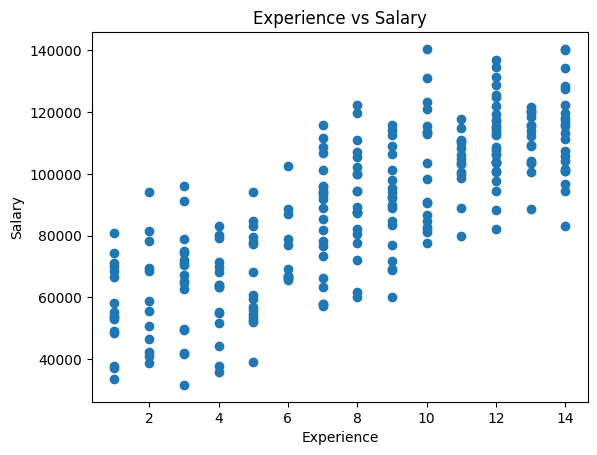

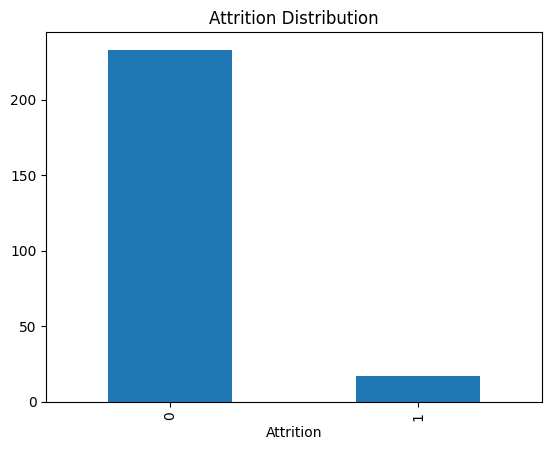

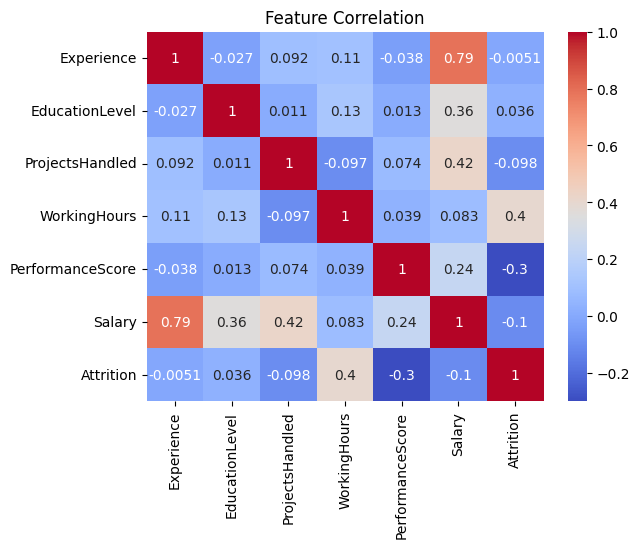


Salary Prediction Results
R2 Score: 0.9360123039034122
RMSE: 6333.423538346537


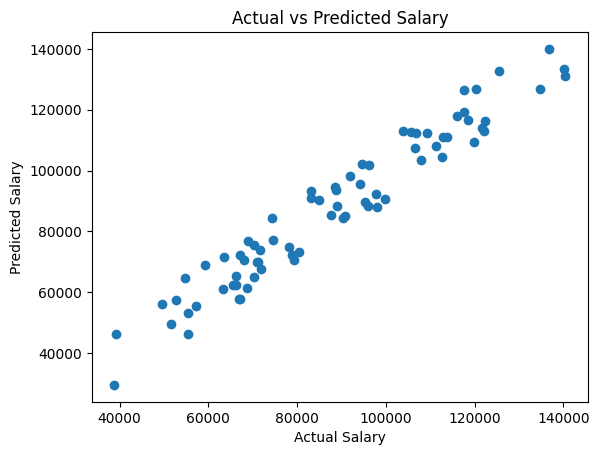


Attrition Prediction Results
Accuracy: 1.0
Confusion Matrix:
 [[68  0]
 [ 0  7]]
Cross Validation Accuracy: 1.0


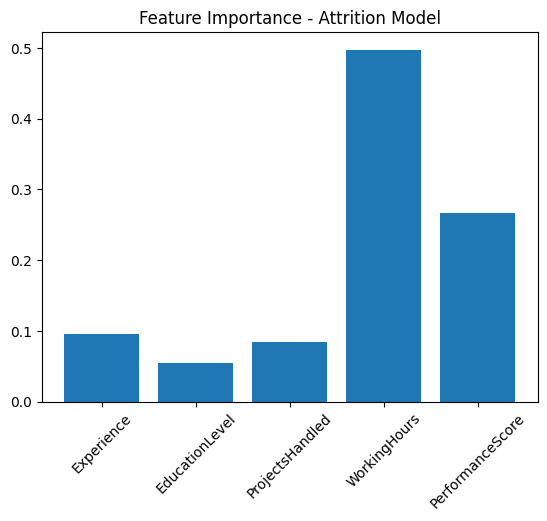


Project Completed Successfully!


In [64]:


# Step 1: Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)


# Step 2: Create Synthetic HR Dataset

data = pd.DataFrame({
    "Experience": np.random.randint(1, 15, 250),
    "EducationLevel": np.random.randint(1, 5, 250),
    "ProjectsHandled": np.random.randint(1, 20, 250),
    "WorkingHours": np.random.randint(6, 12, 250),
    "PerformanceScore": np.random.randint(1, 6, 250)
})

# Salary Formula (Regression Target)
data["Salary"] = (
    data["Experience"] * 5000 +
    data["EducationLevel"] * 8000 +
    data["ProjectsHandled"] * 1500 +
    data["PerformanceScore"] * 4000 +
    np.random.randint(-10000, 10000, 250)
)

# Attrition Formula (Classification Target)
data["Attrition"] = np.where(
    (data["WorkingHours"] > 10) &
    (data["PerformanceScore"] < 3), 1, 0
)

print("Dataset Preview:\n", data.head())


# Step 3: Exploratory Data Analysis

# Plot 1: Experience vs Salary
plt.figure()
plt.scatter(data["Experience"], data["Salary"])
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

# Plot 2: Attrition Count
plt.figure()
data["Attrition"].value_counts().plot(kind='bar')
plt.title("Attrition Distribution")
plt.show()

# Plot 3: Correlation Heatmap
plt.figure()
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


# Step 4: Salary Prediction (Regression)

X_reg = data.drop(["Salary", "Attrition"], axis=1)
y_reg = data["Salary"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)

y_pred_r = reg_model.predict(X_test_r)

print("\nSalary Prediction Results")
print("R2 Score:", r2_score(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))

# Plot 4: Actual vs Predicted Salary
plt.figure()
plt.scatter(y_test_r, y_pred_r)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


# Step 5: Attrition Prediction (Classification)

X_clf = data.drop(["Salary", "Attrition"], axis=1)
y_clf = data["Attrition"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_c, y_train_c)

y_pred_c = rf_model.predict(X_test_c)

print("\nAttrition Prediction Results")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# Cross Validation
cv_score = cross_val_score(rf_model, X_clf, y_clf, cv=5)
print("Cross Validation Accuracy:", cv_score.mean())

# Plot 5: Feature Importance
importance = rf_model.feature_importances_
features = X_clf.columns

plt.figure()
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance - Attrition Model")
plt.show()

print("\nProject Completed Successfully!")


   S_Hours  Marks
0        1     30
1        2     35
2        3     40
3        4     45
4        5     50
5        6     55
6        7     60
7        8     65


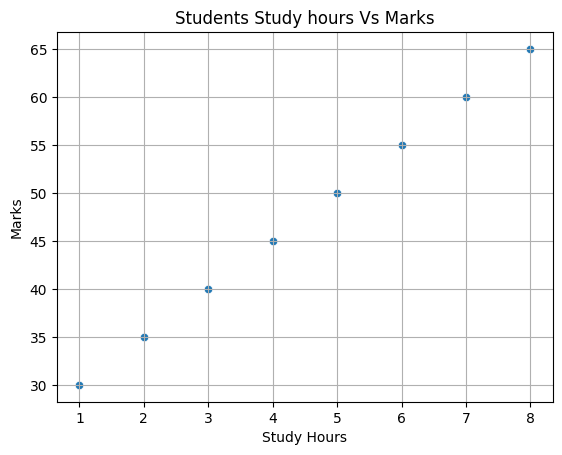

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

data = pd.DataFrame({
    "S_Hours" : [1,2,3,4,5,6,7,8],
    "Marks" : [30, 35, 40, 45, 50, 55, 60, 65]
})
print(data)

sns.scatterplot(x = "S_Hours", y= "Marks", data = data)
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Students Study hours Vs Marks")
plt.grid(True)
plt.show()

In [ ]:
# 2)  from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

data = pd.DataFrame({
    "Age" : [25, 45, 35, 50, 23, 40, 60, 48, 33, 55],
    "BP" : [120, 140, 130, 150, 110, 135, 160, 145, 160, 155],
    "Disease" : [0, 1, 0, 1, 0, 1, 1, 1, 0, 1]

})
x = data[["Age", "BP"]]
y = data["Disease"]

Obj = RandomForestClassifier()
score = cross_val_score(Obj, x, y, cv=5)
print("Cross validation score is :",score)
print("Avearage of score value is :",score.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross validation score is : [1.  1.  0.5 0.5 1. ]
Avearage of score value is : 0.8


In [ ]:
# 3) from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.DataFrame({
    "Experience" : [1, 2, 3, 4, 5],
    "Age" : [22, 25, 30, 35, 40]
})

print("Actual data's :", data)

Obj = StandardScaler()
Data = Obj.fit_transform(data)

print("Scaled Data's :", Data)


Actual data's :    Experience  Age
0           1   22
1           2   25
2           3   30
3           4   35
4           5   40
Scaled Data's : [[-1.41421356 -1.28638417]
 [-0.70710678 -0.82696125]
 [ 0.         -0.06125639]
 [ 0.70710678  0.70444848]
 [ 1.41421356  1.47015334]]


In [ ]:
# 4) from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

Data = pd.DataFrame({
    "Income" : [30000, 40000, 50000, 60000, 70000],
    "Credit_Score" : [600, 500, 700, 750, 800],
    "Loan_Approved" : [0, 0, 1, 1, 1]
})

print(Data)
# print(Data.shape)
# print(Data[Data["Credit_Score"] > 700] )

x = Data[["Income", "Credit_Score"]]
y = Data["Loan_Approved"]

Obj = RandomForestClassifier(n_estimators=50, random_state = 42)

Obj.fit(x, y)

print("Prediction of actual values is :",Obj.predict(x))

new_values = [[50000, 750]]
print("New value prediction is :", Obj.predict(new_values))

print("Loan is approved")

   Income  Credit_Score  Loan_Approved
0   30000           600              0
1   40000           500              0
2   50000           700              1
3   60000           750              1
4   70000           800              1
Prediction of actual values is : [0 0 1 1 1]
New value prediction is : [1]
Loan is approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dataset
data = pd.DataFrame({
    'Income': [30000,40000,50000,60000,70000],
    'CreditScore': [600,650,700,750,800],
    'LoanApproved': [0,0,1,1,1]
})

X = data[['Income','CreditScore']]
y = data['LoanApproved']

# Model
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X, y)

# Predict new customer
new_customer = [[55000,720]]
prediction = model.predict(new_customer)

print("Loan Approval Prediction:", prediction)


Loan Approval Prediction: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Dataset:
    Age  Cholesterol   BP  HeartDisease
0   25          180  120             0
1   45          220  140             1
2   35          190  130             0
3   50          250  150             1
4   23          170  110             0
5   40          210  135             1
6   60          300  160             1
7   48          240  145             1
8   33          200  125             0
9   55          280  155             1


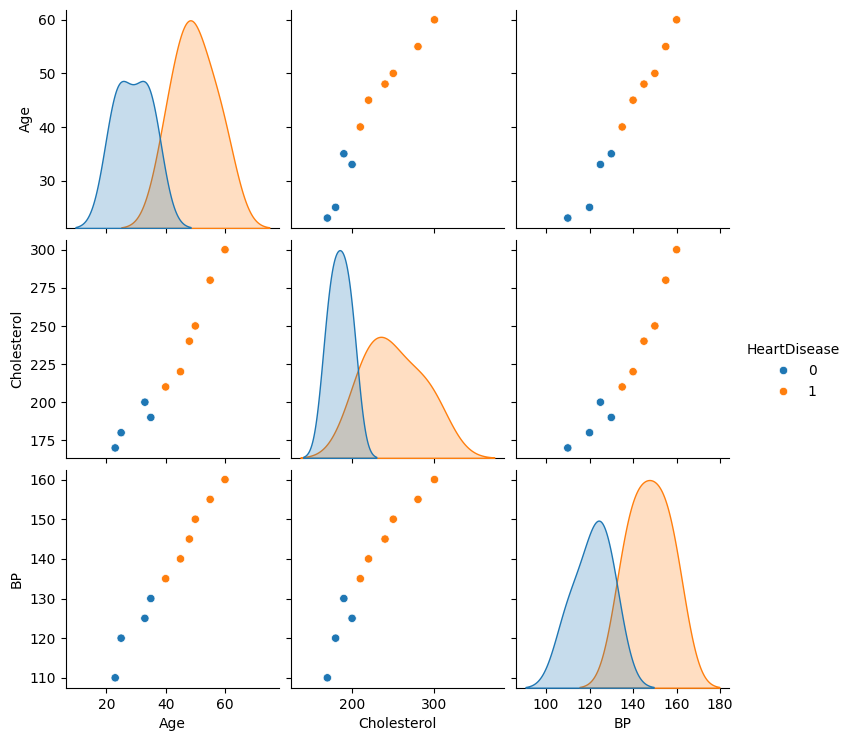

Test Accuracy: 0.6666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Scores: [1. 1. 1. 1. 1.]
Average CV Accuracy: 1.0


In [ ]:
# -----------------------------------
# Heart Disease Prediction Project
# -----------------------------------

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -----------------------------------
# Step 1: Create Simple Dataset
# -----------------------------------

data = pd.DataFrame({
    'Age': [25,45,35,50,23,40,60,48,33,55],
    'Cholesterol': [180,220,190,250,170,210,300,240,200,280],
    'BP': [120,140,130,150,110,135,160,145,125,155],
    'HeartDisease': [0,1,0,1,0,1,1,1,0,1]
})

print("Dataset:\n", data)

# -----------------------------------
# Step 2: Visualization using Seaborn
# -----------------------------------

sns.pairplot(data, hue='HeartDisease')
plt.show()

# -----------------------------------
# Step 3: Split Features and Label
# -----------------------------------

X = data[['Age', 'Cholesterol', 'BP']]
y = data['HeartDisease']

# -----------------------------------
# Step 4: Feature Scaling
# -----------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------
# Step 5: Train-Test Split
# -----------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# -----------------------------------
# Step 6: Random Forest Model
# -----------------------------------

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------------
# Step 7: Prediction
# -----------------------------------

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# -----------------------------------
# Step 8: Cross Validation
# -----------------------------------

cv_scores = cross_val_score(model, X_scaled, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create dataset
data = pd.DataFrame({
    'Experience': [1,2,3,4,5],
    'Age': [22,25,30,35,40]
})

print("Original Data:\n", data)

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("\nScaled Data:\n", scaled_data)


Original Data:
    Experience  Age
0           1   22
1           2   25
2           3   30
3           4   35
4           5   40

Scaled Data:
 [[-1.41421356 -1.28638417]
 [-0.70710678 -0.82696125]
 [ 0.         -0.06125639]
 [ 0.70710678  0.70444848]
 [ 1.41421356  1.47015334]]


   StudyHours  Marks
0           1     35
1           2     40
2           3     50
3           4     55
4           5     65
5           6     70
6           7     80
7           8     90


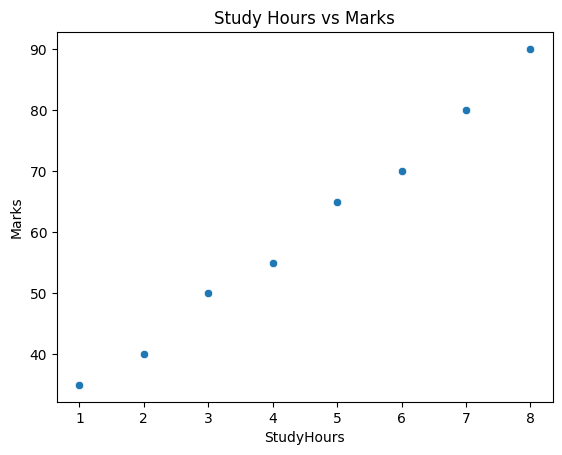

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataset
data = pd.DataFrame({
    'StudyHours': [1,2,3,4,5,6,7,8],
    'Marks': [35,40,50,55,65,70,80,90]
})

print(data)

# Plot relationship
sns.scatterplot(x='StudyHours', y='Marks', data=data)
plt.title("Study Hours vs Marks")
plt.show()


Dataset:
    Age  Cholesterol   BP  HeartDisease
0   25          180  120             0
1   45          220  140             1
2   35          190  130             0
3   50          250  150             1
4   23          170  110             0
5   40          210  135             1
6   60          300  160             1
7   48          240  145             1
8   33          200  125             0
9   55          280  155             1


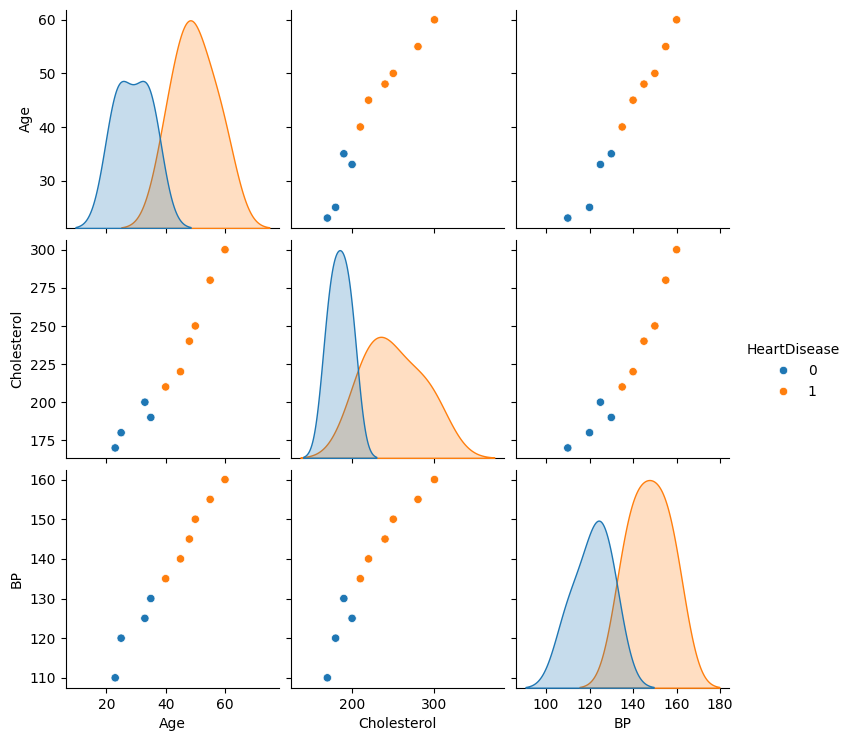

Test Accuracy: 0.6666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Scores: [1. 1. 1. 1. 1.]
Average CV Accuracy: 1.0


In [ ]:
# -----------------------------------
# Heart Disease Prediction Project
# -----------------------------------

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -----------------------------------
# Step 1: Create Simple Dataset
# -----------------------------------

data = pd.DataFrame({
    'Age': [25,45,35,50,23,40,60,48,33,55],
    'Cholesterol': [180,220,190,250,170,210,300,240,200,280],
    'BP': [120,140,130,150,110,135,160,145,125,155],
    'HeartDisease': [0,1,0,1,0,1,1,1,0,1]
})

print("Dataset:\n", data)

# -----------------------------------
# Step 2: Visualization using Seaborn
# -----------------------------------

sns.pairplot(data, hue='HeartDisease')
plt.show()

# -----------------------------------
# Step 3: Split Features and Label
# -----------------------------------

X = data[['Age', 'Cholesterol', 'BP']]
y = data['HeartDisease']

# -----------------------------------
# Step 4: Feature Scaling
# -----------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------
# Step 5: Train-Test Split
# -----------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# -----------------------------------
# Step 6: Random Forest Model
# -----------------------------------

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------------
# Step 7: Prediction
# -----------------------------------

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# -----------------------------------
# Step 8: Cross Validation
# -----------------------------------

cv_scores = cross_val_score(model, X_scaled, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Dataset Preview:
    Experience  EducationLevel  ProjectsHandled  WorkingHours  \
0           7               2                1            11   
1           4               3                9             9   
2          13               2               11             9   
3          11               3               16            10   
4           8               1                7             7   

   PerformanceScore  Salary  Attrition  
0                 2   57811          1  
1                 1   69949          0  
2                 4  104268          0  
3                 3  110490          0  
4                 2   72034          0  


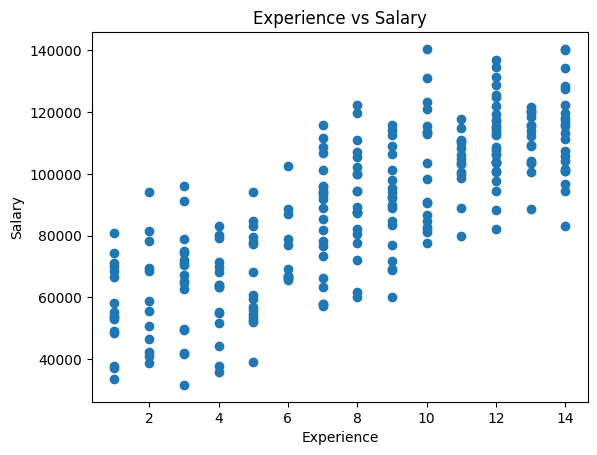

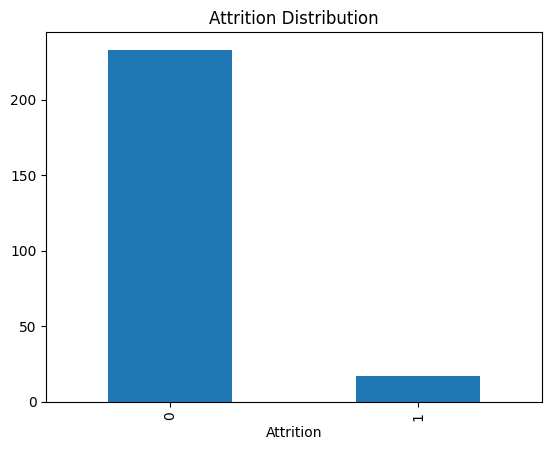

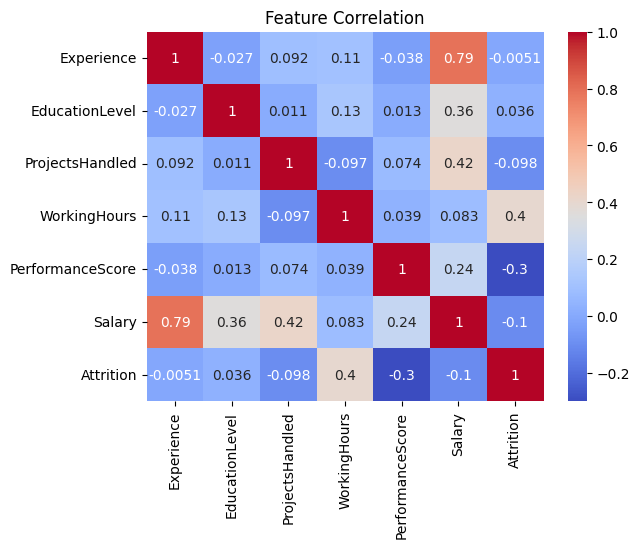


Salary Prediction Results
R2 Score: 0.9360123039034122
RMSE: 6333.423538346537


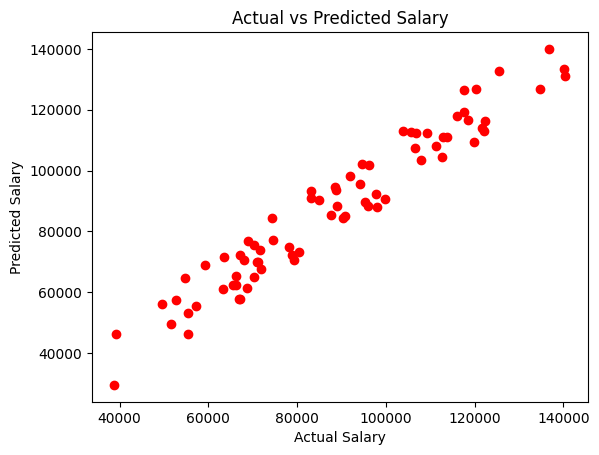


Attrition Prediction Results
Accuracy: 1.0
Confusion Matrix:
 [[68  0]
 [ 0  7]]
Cross Validation Accuracy: 1.0


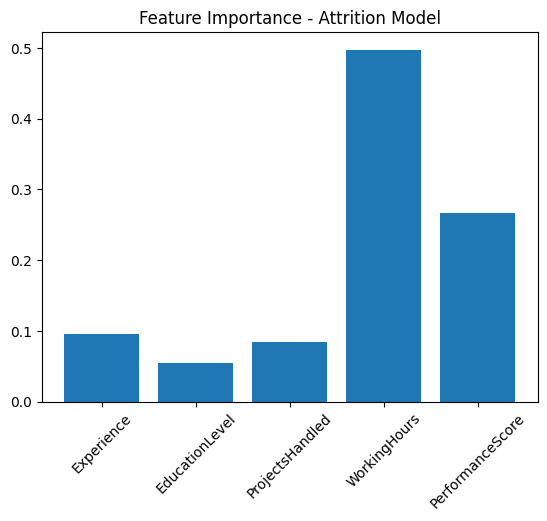


Project Completed Successfully!


In [ ]:

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)

# Step 2: Create Synthetic HR Dataset
data = pd.DataFrame({
    "Experience": np.random.randint(1, 15, 250),
    "EducationLevel": np.random.randint(1, 5, 250),
    "ProjectsHandled": np.random.randint(1, 20, 250),
    "WorkingHours": np.random.randint(6, 12, 250),
    "PerformanceScore": np.random.randint(1, 6, 250)
})

# Salary Formula (Regression Target)
data["Salary"] = (
    data["Experience"] * 5000 +
    data["EducationLevel"] * 8000 +
    data["ProjectsHandled"] * 1500 +
    data["PerformanceScore"] * 4000 +
    np.random.randint(-10000, 10000, 250)
)

# Attrition Formula (Classification Target)
data["Attrition"] = np.where(
    (data["WorkingHours"] > 10) &
    (data["PerformanceScore"] < 3), 1, 0
)

print("Dataset Preview:\n", data.head())

# Step 3: Exploratory Data Analysis

# Plot 1: Experience vs Salary
plt.figure()
plt.scatter(data["Experience"], data["Salary"])
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

# Plot 2: Attrition Count
plt.figure()
data["Attrition"].value_counts().plot(kind='bar')
plt.title("Attrition Distribution")
plt.show()

# Plot 3: Correlation Heatmap
plt.figure()
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


# Step 4: Salary Prediction (Regression)

X_reg = data.drop(["Salary", "Attrition"], axis=1)
y_reg = data["Salary"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)

y_pred_r = reg_model.predict(X_test_r)

print("\nSalary Prediction Results")
print("R2 Score:", r2_score(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))

# Plot 4: Actual vs Predicted Salary
plt.figure()
plt.scatter(y_test_r, y_pred_r , color = "red")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


# Step 5: Attrition Prediction (Classification)

X_clf = data.drop(["Salary", "Attrition"], axis=1)
y_clf = data["Attrition"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_c, y_train_c)

y_pred_c = rf_model.predict(X_test_c)

print("\nAttrition Prediction Results")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# Cross Validation
cv_score = cross_val_score(rf_model, X_clf, y_clf, cv=5)
print("Cross Validation Accuracy:", cv_score.mean())

# Plot 5: Feature Importance
importance = rf_model.feature_importances_
features = X_clf.columns

plt.figure()
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance - Attrition Model")
plt.show()

print("\nProject Completed Successfully!")


Dataset Head:
    TransactionAmount  TransactionTime  AccountAge  LocationChange  \
0              15895                3           4               1   
1                960               17           6               0   
2              38258                5           6               1   
3              44832               17           5               0   
4              11384               17           1               0   

   OnlineTransaction  Fraud  
0                  1      0  
1                  0      0  
2                  1      1  
3                  1      0  
4                  1      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   TransactionAmount  200 non-null    int64
 1   TransactionTime    200 non-null    int64
 2   AccountAge         200 non-null    int64
 3   LocationChange     200 non-null    i

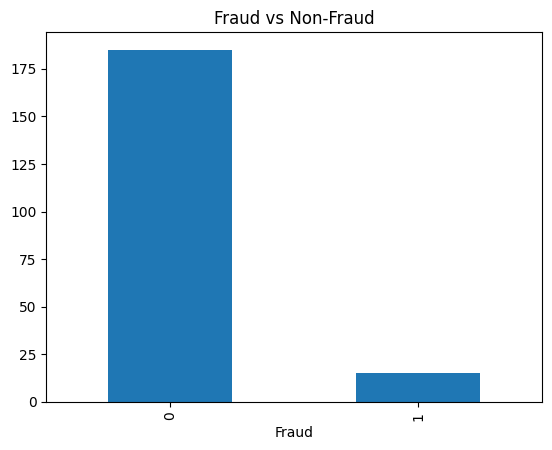


Logistic Regression Results
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[50  0]
 [ 8  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.20      0.33        10

    accuracy                           0.87        60
   macro avg       0.93      0.60      0.63        60
weighted avg       0.89      0.87      0.83        60

Cross Validation Accuracy: 0.9714285714285715

Random Forest Results
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[50  0]
 [ 8  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.20      0.33        10

    accuracy                           0.87        60
   macro avg       0.93      0.60      0.63        60
weighted avg       0.89      0.87      0.83        60

Cross Validation Accuracy: 0.9642857142857142


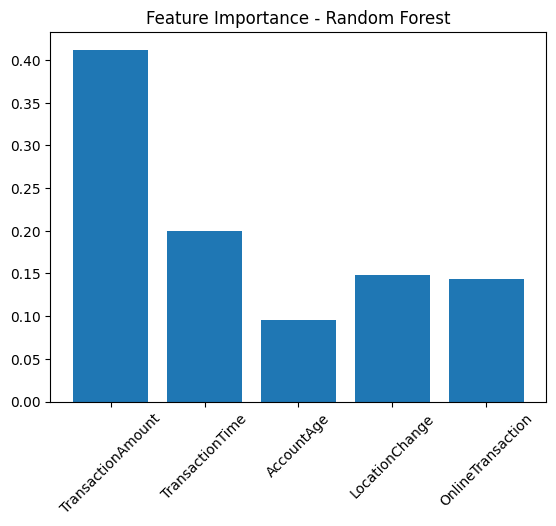


Model Comparison:
Logistic Regression CV Accuracy: 0.9714285714285715
Random Forest CV Accuracy: 0.9642857142857142

Project Completed Successfully!


In [ ]:
"""
Credit Card Fraud Detection Project
Author: Your Name
Description:
This project builds a machine learning model to detect fraudulent transactions.
"""

# ===============================
# Step 1: Import Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ===============================
# Step 2: Create Sample Dataset
# ===============================

np.random.seed(42)

data = pd.DataFrame({
    "TransactionAmount": np.random.randint(100, 50000, 200),
    "TransactionTime": np.random.randint(1, 24, 200),
    "AccountAge": np.random.randint(1, 10, 200),
    "LocationChange": np.random.randint(0, 2, 200),
    "OnlineTransaction": np.random.randint(0, 2, 200),
})

# Fraud logic (synthetic rule)
data["Fraud"] = np.where(
    (data["TransactionAmount"] > 30000) &
    (data["LocationChange"] == 1) &
    (data["OnlineTransaction"] == 1), 1, 0
)

print("Dataset Head:\n", data.head())

# ===============================
# Step 3: Exploratory Data Analysis
# ===============================

print("\nDataset Info:")
print(data.info())

print("\nClass Distribution:")
print(data["Fraud"].value_counts())

plt.figure()
data["Fraud"].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud")
plt.show()

# ===============================
# Step 4: Define Features & Target
# ===============================

X = data.drop("Fraud", axis=1)
y = data["Fraud"]

# ===============================
# Step 5: Train-Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ===============================
# Step 6: Feature Scaling
# ===============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# Step 7: Model 1 - Logistic Regression
# ===============================

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Cross Validation
cv_score_log = cross_val_score(log_model, X_train_scaled, y_train, cv=5)
print("Cross Validation Accuracy:", cv_score_log.mean())

# ===============================
# Step 8: Model 2 - Random Forest
# ===============================

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

cv_score_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross Validation Accuracy:", cv_score_rf.mean())

# ===============================
# Step 9: Feature Importance
# ===============================

importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure()
plt.bar(feature_names, importance)
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=45)
plt.show()

# ===============================
# Step 10: Model Comparison
# ===============================

print("\nModel Comparison:")
print("Logistic Regression CV Accuracy:", cv_score_log.mean())
print("Random Forest CV Accuracy:", cv_score_rf.mean())

print("\nProject Completed Successfully!")


Dataset:
     Tenure  MonthlyCharges  ContractType  Churn
0        1              70             0      1
1        2              75             0      1
2        3              80             0      1
3        5              65             0      1
4        8              60             1      0
5       10              55             1      0
6       12              50             1      0
7       15              45             1      0
8       18              40             1      0
9       20              38             1      0
10      24              35             1      0
11      30              30             1      0
12      36              28             1      0
13      40              25             1      0
14      45              20             1      0
Predicted: [0 0 0 1 0]
Actual: [1 0 0 1 0]
Confusion Matrix:
 [[3 0]
 [1 1]]
Accuracy: 0.8
Precision: 1.0
F1 Score: 0.6666666666666666


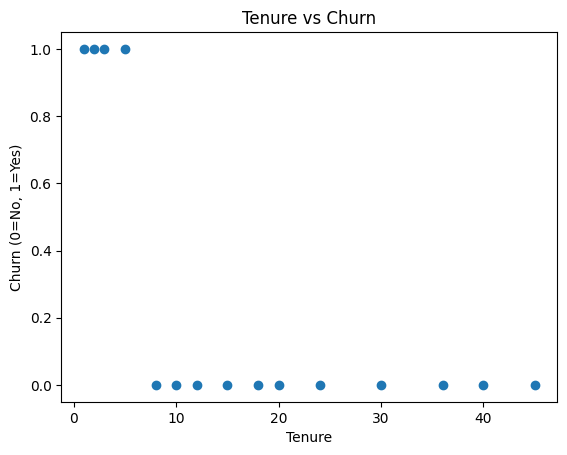

In [ ]:
# Customer Churn Prediction Project

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

# Step 2: Create Sample Real-Time Dataset
data = pd.DataFrame({
    "Tenure": [1, 2, 3, 5, 8, 10, 12, 15, 18, 20, 24, 30, 36, 40, 45],
    "MonthlyCharges": [70, 75, 80, 65, 60, 55, 50, 45, 40, 38, 35, 30, 28, 25, 20],
    "ContractType": [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1],  # 0 = Month-to-month, 1 = Long-term
    "Churn": [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]
})

print("Dataset:\n", data)

# Step 3: Features and Target
X = data[["Tenure", "MonthlyCharges", "ContractType"]]
y = data["Churn"]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 5: Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Prediction
y_pred = model.predict(X_test)

print("Predicted:", y_pred)
print("Actual:", y_test.values)

# Step 7: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Step 8: Visualization
plt.scatter(data["Tenure"], data["Churn"])
plt.xlabel("Tenure")
plt.ylabel("Churn (0=No, 1=Yes)")
plt.title("Tenure vs Churn")
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Features: [Study Hours, Attendance]
X = np.array([
    [2, 60],
    [4, 65],
    [6, 70],
    [8, 80],
    [10, 90],
    [1, 50],
    [3, 55],
    [7, 75]
])

# Target: Pass (1) or Fail (0)
y = np.array([0, 0, 1, 1, 1, 0, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_prediction = knn.predict([[5, 72]])
print("k-NN Prediction:", knn_prediction)

# Optional: Evaluate the model
print("Accuracy:", knn.score(X_test, y_test))

k-NN Prediction: [1]
Accuracy: 0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_prediction = knn.predict([[5, 72]])
print("k-NN Prediction:", knn_prediction)


k-NN Prediction: [1]


Accuracy: 1.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


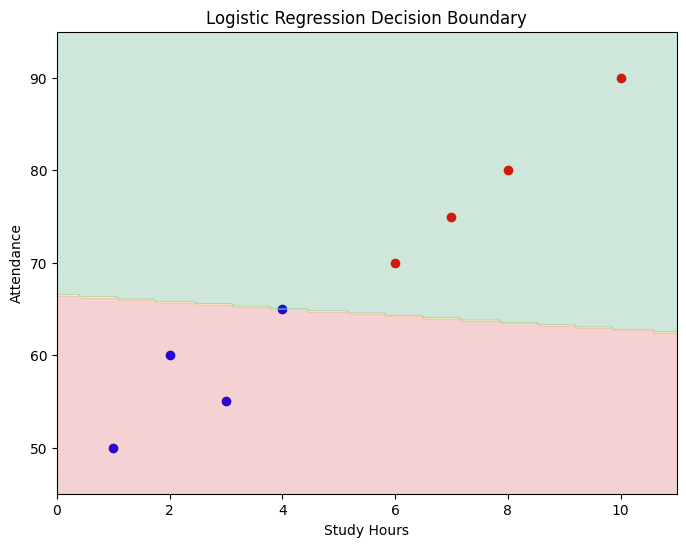

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Features: [Study Hours, Attendance]
X = np.array([
    [2, 60],
    [4, 65],
    [6, 70],
    [8, 80],
    [10, 90],
    [1, 50],
    [3, 55],
    [7, 75]
])

# Target: Pass (1) or Fail (0)
y = np.array([0, 0, 1, 1, 1, 0, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Plot data and decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
for i, (x, label) in enumerate(zip(X, y)):
    plt.scatter(x[0], x[1], c='blue' if label == 0 else 'red', label=f"Data {i}" if i < 2 else None)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdYlGn')

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Study Hours")
plt.ylabel("Attendance")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Features: [Study Hours, Attendance]
X = np.array([
    [2, 60],
    [4, 65],
    [6, 70],
    [8, 80],
    [10, 90],
    [1, 50],
    [3, 55],
    [7, 75]
])

# Target: Pass (1) or Fail (0)
y = np.array([0, 0, 1, 1, 1, 0, 0, 1])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Accuracy: 1.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


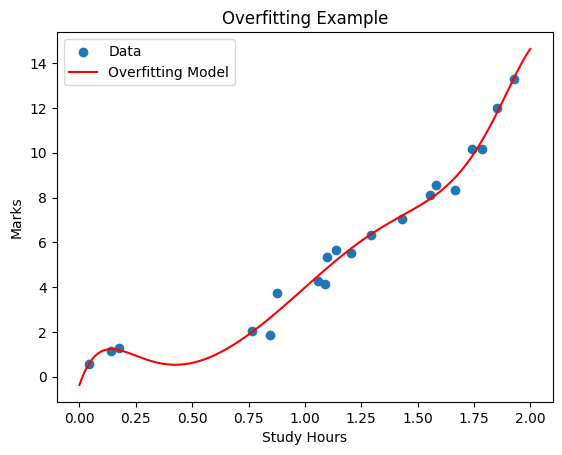

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(20, 1)
y = 3 * X**2 + 1 + np.random.randn(20, 1) * 0.5

# Split data into training set
X_train = X
y_train = y

# Create polynomial features
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X_train)

# Train overfitting model
overfit_model = LinearRegression()
overfit_model.fit(X_poly, y_train)

# Generate range for plotting
X_range = np.linspace(0, 2, 200).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# Predict using overfitting model
y_overfit = overfit_model.predict(X_range_poly)

# Plot data and overfitting model
plt.scatter(X, y, label="Data")
plt.plot(X_range, y_overfit, label="Overfitting Model", color="red")
plt.title("Overfitting Example")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.legend()
plt.show()

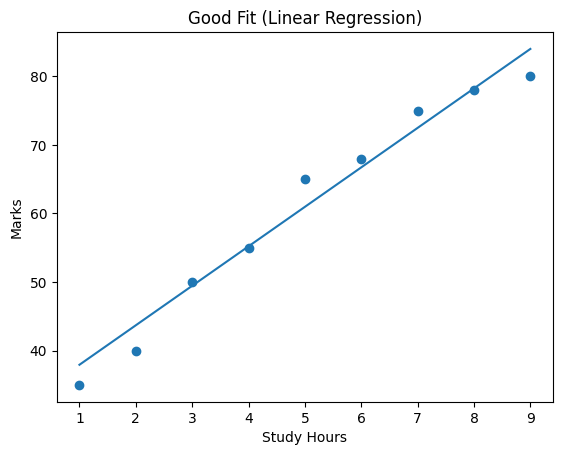

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([35,40,50,55,65,68,75,78,80])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

X_range = np.linspace(1, 9, 100).reshape(-1,1)
y_linear = linear_model.predict(X_range)

plt.scatter(X, y)
plt.plot(X_range, y_linear)
plt.title("Good Fit (Linear Regression)")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()


In [ ]:
# Model Validation, Tuning & Performance Improvement with Visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Create Real-World Dataset (Loan Approval)
# -----------------------------

data = pd.DataFrame({
    "Income": [25000, 50000, 60000, 30000, 80000, 120000, 40000, 70000, 90000, 20000],
    "Age": [25, 45, 35, 28, 50, 40, 30, 38, 55, 23],
    "CreditScore": [600, 750, 720, 580, 800, 820, 650, 710, 790, 500],
    "LoanApproved": [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
})

X = data[["Income", "Age", "CreditScore"]]
y = data["LoanApproved"]

# -----------------------------
# Step 2: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Step 3: Train Basic Model
# -----------------------------

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
basic_accuracy = accuracy_score(y_test, y_pred)
print("Basic Model Accuracy:", basic_accuracy)

# -----------------------------
# Step 4: Cross-Validation
# -----------------------------

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# -----------------------------
# Step 5: Hyperparameter Tuning
# -----------------------------

param_grid = {
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# -----------------------------
# Step 6: Train Tuned Model
# -----------------------------

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print("Tuned Model Accuracy:", tuned_accuracy)

# =========================================================
# ================= VISUALIZATION SECTION =================
# =========================================================

# 1️⃣ Accuracy Comparison Plot
plt.figure()
plt.bar(["Basic Model", "Tuned Model"], [basic_accuracy, tuned_accuracy])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# 2️⃣ Cross Validation Scores Plot
plt.figure()
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title("Cross Validation Scores")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# 3️⃣ Decision Tree Visualization (Tuned Model)
plt.figure(figsize=(12, 6))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=["Not Approved", "Approved"],
          filled=True)
plt.title("Tuned Decision Tree Structure")
plt.show()


Basic Model Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.0


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
import numpy as np

# Create a 2D array
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("Original array:")
print(arr)

print("\nFirst column:")
print(arr[:, 0])  # [1, 4, 7]

print("\nSecond column:")
print(arr[:, 1])  # [2, 5, 8]

Original array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

First column:
[1 4 7]

Second column:
[2 5 8]


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Accuracy: 0.8


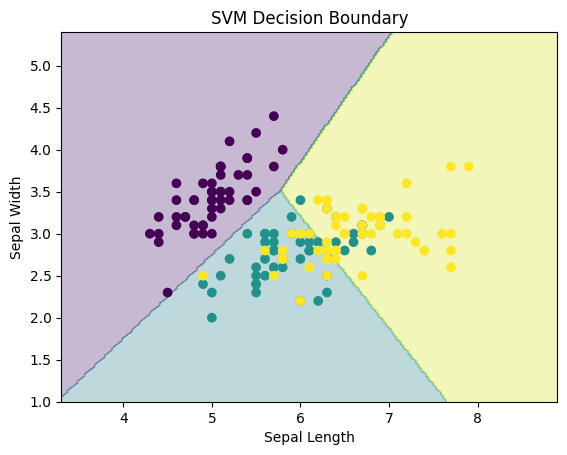

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
iris = datasets.load_iris()

# Use only first 2 features for visualization
X = iris.data[:, :2]   # Sepal Length & Sepal Width
y = iris.target

# -----------------------------
# Step 2: Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Step 3: Create & Train Model
# -----------------------------
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# -----------------------------
# Step 4: Prediction & Accuracy
# -----------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# -----------------------------
# Step 5: Plot Decision Boundary
# -----------------------------

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Predict for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("SVM Decision Boundary")
plt.show()


Cluster Labels: [1 1 1 0 0 0]
Centroids: [[10.  2.]
 [ 1.  2.]]


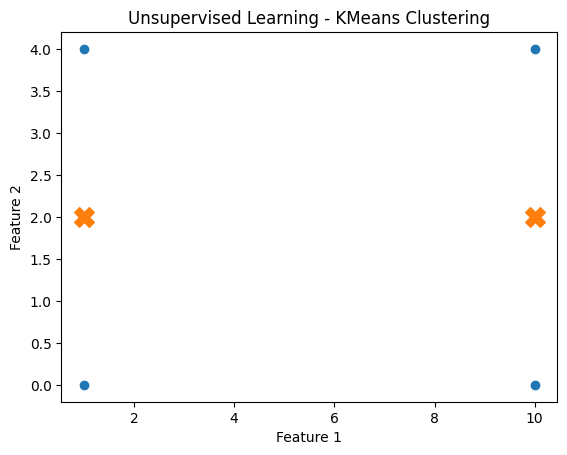

In [ ]:
# Unsupervised Learning - KMeans Clustering Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create Unlabeled Dataset
X = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [10, 2],
    [10, 4],
    [10, 0]
])

# Step 2: Create Model
kmeans = KMeans(n_clusters=2, random_state=0)

# Step 3: Train Model
kmeans.fit(X)

# Step 4: Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Centroids:", centroids)

# Step 5: Plot graph
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Unsupervised Learning - KMeans Clustering")
plt.show()


Predicted marks for 6 hours: [110.]


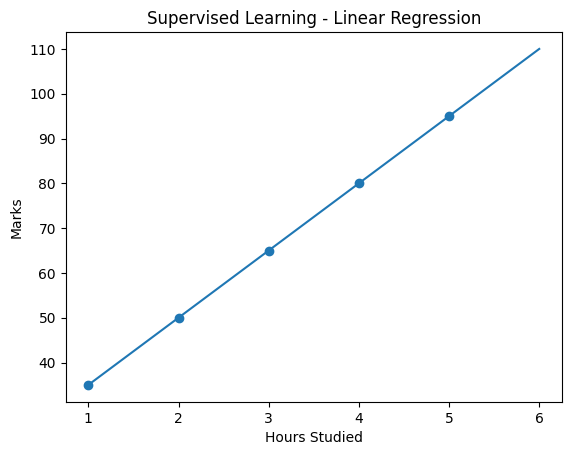

In [ ]:
# Supervised Learning - Linear Regression Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create Labeled Dataset
# Input (Hours Studied)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Output (Marks Scored)
y = np.array([35, 50, 65, 80, 95])

# Step 2: Create Model
model = LinearRegression()

# Step 3: Train Model
model.fit(X, y)

# Step 4: Predict new value
predicted_marks = model.predict([[6]])
print("Predicted marks for 6 hours:", predicted_marks)

# Step 5: Create smooth line for plotting
X_range = np.linspace(1, 6, 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Step 6: Plot graph
plt.scatter(X, y)
plt.plot(X_range, y_pred)
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.title("Supervised Learning - Linear Regression")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1,2], [1,4], [1,0],
              [10,2], [10,4], [10,0]])

model = KMeans(n_clusters=2)
model.fit(X)

print("Cluster labels:", model.labels_)


Cluster labels: [0 0 0 1 1 1]


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data (Hours studied vs Marks)
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
y = np.array([35, 50, 65, 80, 95])

model = LinearRegression()
model.fit(X, y)

print("Predicted marks for 6 hours:", model.predict([[6]]))


Predicted marks for 6 hours: [110.]


Confusion Matrix:
 [[4 1]
 [1 4]]
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8


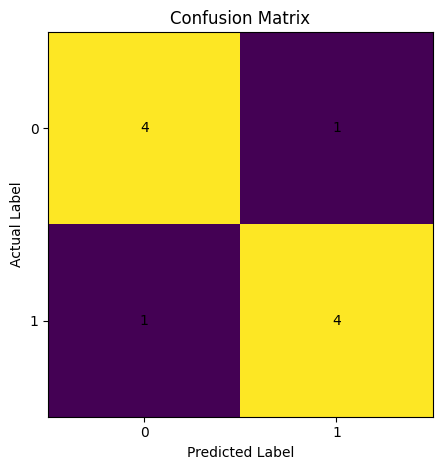

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -------------------------------
# Step 1: Actual & Predicted Data
# -------------------------------
y_true = [1,0,1,1,0,1,0,0,1,0]
y_pred = [1,0,1,0,0,1,0,1,1,0]

# -------------------------------
# Step 2: Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# -------------------------------
# Step 3: Visualization (Single Plot)
# -------------------------------
plt.figure()

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Add values inside boxes
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i][j], ha='center', va='center')

plt.xticks([0,1])
plt.yticks([0,1])

plt.tight_layout()
plt.show()


In [ ]:
!pip install pptx
from pptx import Presentation
from pptx.util import Inches, Pt

def create_ml_presentation():
    prs = Presentation()

    # Slide 1: Title Slide
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = "Model Validation & Tuning"
    slide.placeholders[1].text = "Improving ML Performance for Students\nFocus: Validation, Tuning, and Overfitting"

    # Slide 2: The Core Mindset
    slide = prs.slides.add_slide(prs.slide_layouts[1])
    slide.shapes.title.text = "1. The Train-Test-Validation Mindset"
    content = slide.placeholders[1].text_frame
    content.text = "Think of it as preparing for an exam:"
    content.add_paragraph().text = "• Training Set: The Textbook (Learning patterns)"
    content.add_paragraph().text = "• Validation Set: The Mock Test (Checking progress & adjusting settings)"
    content.add_paragraph().text = "• Test Set: The Final Exam (Unseen data for final grade)"

    # Slide 3: Cross-Validation & Tuning
    slide = prs.slides.add_slide(prs.slide_layouts[1])
    slide.shapes.title.text = "2. Cross-Validation & Hyperparameters"
    content = slide.placeholders[1].text_frame
    content.text = "Cross-Validation (K-Fold):"
    content.add_paragraph().text = "• Rotating the 'Mock Test' so every piece of data is used for testing."
    content.add_paragraph().text = "Hyperparameters:"
    content.add_paragraph().text = "• Settings like 'How deep should the tree grow?' or 'How fast should we learn?'"

    # Slide 4: Preventing Overfitting
    slide = prs.slides.add_slide(prs.slide_layouts[1])
    slide.shapes.title.text = "3. The Overfitting Trap"
    content = slide.placeholders[1].text_frame
    content.text = "Overfitting (Memorization):"
    content.add_paragraph().text = "• Model performs great on Training data but fails on Test data."
    content.add_paragraph().text = "Prevention Strategies:"
    content.add_paragraph().text = "• Regularization (Simpler models)"
    content.add_paragraph().text = "• Pruning (Shortening Decision Trees)"
    content.add_paragraph().text = "• Getting more data"

    # Slide 5: Practical Activity
    slide = prs.slides.add_slide(prs.slide_layouts[1])
    slide.shapes.title.text = "4. Activity: Grid Search"
    content = slide.placeholders[1].text_frame
    content.text = "Comparison Task:"
    content.add_paragraph().text = "1. Train a Decision Tree with no limits (Depth = None)."
    content.add_paragraph().text = "2. Use GridSearchCV to find the 'Sweet Spot'."
    content.add_paragraph().text = "3. Compare: Did the 'simple' tuned model beat the 'complex' one?"

    # Save
    prs.save('ML_Validation_and_Tuning.pptx')
    print("Presentation saved as ML_Validation_and_Tuning.pptx")

create_ml_presentation()

ERROR: Could not find a version that satisfies the requirement pptx (from versions: none)
ERROR: No matching distribution found for pptx


ModuleNotFoundError: No module named 'pptx'

In [ ]:
# Model Validation, Tuning & Performance Improvement with Visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Create Real-World Dataset (Loan Approval)
# -----------------------------

data = pd.DataFrame({
    "Income": [25000, 50000, 60000, 30000, 80000, 120000, 40000, 70000, 90000, 20000],
    "Age": [25, 45, 35, 28, 50, 40, 30, 38, 55, 23],
    "CreditScore": [600, 750, 720, 580, 800, 820, 650, 710, 790, 500],
    "LoanApproved": [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
})

X = data[["Income", "Age", "CreditScore"]]
y = data["LoanApproved"]

# -----------------------------
# Step 2: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Step 3: Train Basic Model
# -----------------------------

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
basic_accuracy = accuracy_score(y_test, y_pred)
print("Basic Model Accuracy:", basic_accuracy)

# -----------------------------
# Step 4: Cross-Validation
# -----------------------------

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# -----------------------------
# Step 5: Hyperparameter Tuning
# -----------------------------

param_grid = {
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# -----------------------------
# Step 6: Train Tuned Model
# -----------------------------

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print("Tuned Model Accuracy:", tuned_accuracy)

# =========================================================
# ================= VISUALIZATION SECTION =================
# =========================================================

# 1️⃣ Accuracy Comparison Plot
plt.figure()
plt.bar(["Basic Model", "Tuned Model"], [basic_accuracy, tuned_accuracy])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# 2️⃣ Cross Validation Scores Plot
plt.figure()
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title("Cross Validation Scores")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# 3️⃣ Decision Tree Visualization (Tuned Model)
plt.figure(figsize=(12, 6))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=["Not Approved", "Approved"],
          filled=True)
plt.title("Tuned Decision Tree Structure")
plt.show()


Basic Model Accuracy: 1.0
Cross Validation Scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


ValueError: n_splits=5 cannot be greater than the number of members in each class.

Accuracy: 0.8


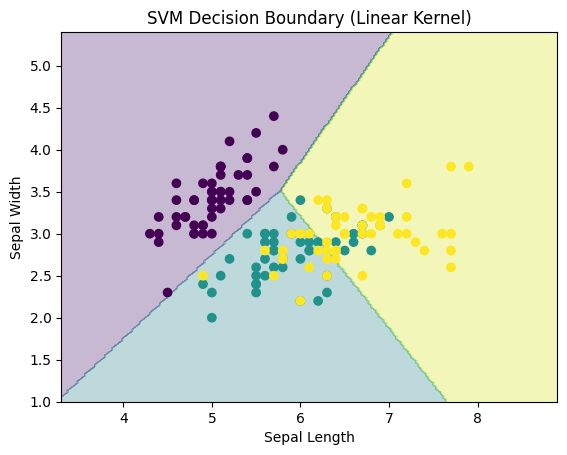

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
iris = datasets.load_iris()

# Use only first 2 features for visualization
X = iris.data[:, :2]   # Sepal Length & Sepal Width
y = iris.target

# -----------------------------
# Step 2: Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Step 3: Create & Train Model
# -----------------------------
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# -----------------------------
# Step 4: Prediction & Accuracy
# -----------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# -----------------------------
# Step 5: Plot Decision Boundary
# -----------------------------

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Predict for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("SVM Decision Boundary (Linear Kernel)")
plt.show()


Confusion Matrix:
 [[4 1]
 [1 4]]
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8


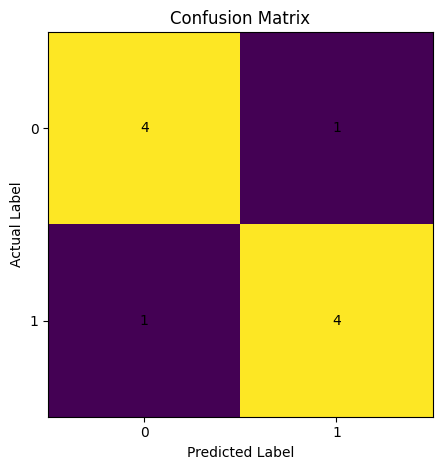

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -------------------------------
# Step 1: Actual & Predicted Data
# -------------------------------
y_true = [1,0,1,1,0,1,0,0,1,0]
y_pred = [1,0,1,0,0,1,0,1,1,0]

# -------------------------------
# Step 2: Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# -------------------------------
# Step 3: Visualization (Single Plot)
# -------------------------------
plt.figure()

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Add values inside boxes
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i][j], ha='center', va='center')

plt.xticks([0,1])
plt.yticks([0,1])

plt.tight_layout()
plt.show()


In [ ]:
print("python ",end = " ")
print("is a ",end = " ")
print("powerfull ",end=" ")
print("language")

python  is a  powerfull  language


In [ ]:
name,marks,attendance
Ravi,78,85
Anu,65,70
Raj,90,95


NameError: name 'name' is not defined

In [ ]:
import csv

with open("students.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
# Create students.csv file
csv_data = """name,marks,attendance
Ravi,78,85
Anu,65,70
Raj,90,95
"""

with open("students.csv", "w") as f:
    f.write(csv_data)

print("students.csv created successfully")


In [ ]:
import csv

with open("students.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
file = open("result.txt", "w")
file.write("Ravi - Pass\nAnu - Pass\nRaj - Pass")
file.close()


In [ ]:
file = open("result.txt", "r")
content = file.read()
print(content)
file.close()


In [ ]:
with open("result.txt", "r") as file:
    print(file.read())


In [ ]:
import csv

with open("students.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
# Create students.csv file
csv_data = """name,marks,attendance
Ravi,78,85
Anu,65,70
Raj,90,95
"""

with open("students.csv", "w") as f:
    f.write(csv_data)

print("students.csv created successfully")


In [ ]:
import csv

with open("students.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
import csv

with open("students.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
import csv

with open("students.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
import csv

with open("students.csv", "r") as file:
    reader = csv.reader(file)
    next(reader)   # skip header

    for row in reader:
        name = row[0]
        marks = row[1]
        print(name, marks)


In [ ]:
import csv

with open("new_students.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["name", "marks", "attendance"])
    writer.writerow(["Amit", 88, 92])
    writer.writerow(["Sita", 76, 85])

print("new_students.csv created successfully")



In [ ]:
with open("new_students.csv", "r") as file:
    print(file.read())


In [ ]:
import pandas as pd

data = pd.read_csv("students.csv")
print(data)
print("==================")
print(data["marks"])


In [ ]:
import numpy as np

marks = np.array([78, 65, 90, 55, 82])
print(marks)


In [ ]:
import numpy as np
# Python list
marks_list = [78, 65, 90]

# NumPy array
marks_array = np.array([78, 65, 90])

print(type(marks_list))
print(type(marks_array))


In [ ]:
marks = np.array([78, 65, 90, 55])
updated_marks = marks + 5
print(updated_marks)
print(type(marks))

In [ ]:
marks = np.array([78, 65, 90, 55, 82])

print("Average:", marks.mean())
print("Maximum:", marks.max())
print("Minimum:", marks.min())


In [ ]:
students = np.array([
    [78, 85],
    [65, 70],
    [90, 95]
])

print(students)
print(type(students))

In [ ]:
import pandas as pd

data = pd.read_csv("students.csv")
print(data)
print(type(data))
print(data["marks"])

In [ ]:
print(data.head())      # first 5 rows
print("===========")
print(data.shape)       # rows & columns
print("============")
print(data.describe())  # statistics


In [ ]:
data = pd.DataFrame({
    "name": ["Ravi", "Anu", "Raj"],
    "marks": [78, None, 90]
})

print(data)
data["marks"].fillna(data["marks"].mean(), inplace=True)
print(data)



In [ ]:
import pandas as pd

data = pd.DataFrame({
    "name": ["Ravi", "Anu", "Raj"],
    "marks": [78, None, 90]
})

print("Before filling:")
print(data)

data["marks"] = data["marks"].fillna(data["marks"].mean())

print("\nAfter filling with mean:")
print(data)


In [ ]:
import numpy as np
import pandas as pd

marks = np.array([78, 65, 90, 55])
df = pd.DataFrame(marks, columns=["marks"])
print(df)


In [ ]:
import pandas as pd

data = pd.read_csv("students.csv")
avg = data["marks"].mean()

print("Average marks:", avg)

print("Above average students:")
print(data[data["marks"] > avg])


In [ ]:
import pandas as pd

data = pd.DataFrame({
    "name": ["Ravi", "Anu", "Raj", "Ravi"],
    "marks": [78, None, 200, 78],
    "attendance": [85, 70, None, 85]
})

print(data)
print(data.isnull())
print(data.isnull().sum())
data.dropna(inplace=True)
print(data)

In [ ]:
import pandas as pd

data = pd.DataFrame({
    "name": ["Ravi", "Anu", "Raj", "Ravi"],
    "marks": [78, None, 200, 78],
    "attendance": [85, 70, None, 85]
})
data.dropna(inplace=True)
print(data)
data.drop_duplicates(inplace=True)
print(data)
print(data)

In [ ]:
data = pd.DataFrame({
    "name": ["Ravi", "Anu", "Raj", "Ravi"],
    "marks": [78, None, 200, 78],
    "attendance": [85, 70, None, 85]
})
data = data[data["marks"] <= 100]
print(data)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[["marks"]] = scaler.fit_transform(data[["marks"]])

print(data)


In [ ]:
data["marks"] = data["marks"].astype(int)
print(data.dtypes)


In [ ]:
import pandas as pd

# Create DataFrame
data = pd.DataFrame({
    "name": ["Ravi", "Anu", "Raj", "Sneha"],
    "gender": ["Male", "Female", "Male", "Female"],
    "marks": [78, 85, 90, 88]
})

# Display original data
print("Before mapping gender:")
print(data)

# Map gender values to numbers
data["gender"] = data["gender"].map({
    "Male": 0,
    "Female": 1
})

# Display updated data
print("\nAfter mapping gender:")
print(data)


In [ ]:
data = pd.DataFrame({
    "gender": ["Male", "Female", "Female", "Male"],
    "marks": [78, 65, 90, 55]
})
data["gender"] = data["gender"].map({"Male": 0, "Female": 1})
print(data)


In [ ]:
name,marks,attendance
Ravi,78,85
Anu,65,70
Raj,90,95
Sita,55,60
Amit,88,92


In [ ]:
import pandas as pd

# Step 1: Create DataFrame
data = pd.DataFrame({
    "name": ["Ravi", "Anu", "Raj", "Sita", "Amit"],
    "marks": [78, 65, 90, 55, 88],
    "attendance": [85, 70, 95, 60, 92]
})

# Step 2: Save DataFrame to CSV file
data.to_csv("students.csv", index=False)

print("CSV file created successfully!\n")

# Step 3: Read the CSV file
new_data = pd.read_csv("students.csv")

# Step 4: Print the data
print(new_data)


In [ ]:
import pandas as pd

data = pd.read_csv("students.csv")
print(data)
print(data.shape)
print(data.columns)
print(data.head())
print(data.describe())
print(data.isnull().sum())
print(data["marks"].mean())
print(data["marks"].max())
print(data["marks"].min())
weak_students = data[data["marks"] < 60]
print(weak_students)
top_students = data[data["marks"] > 85]
print(top_students)
print(data[["marks", "attendance"]].corr())

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data["attendance"], data["marks"])
plt.xlabel("Attendance")
plt.ylabel("Marks")
plt.title("Attendance vs Marks")
plt.show()


In [ ]:
import pandas as pd

data = pd.read_csv("students.csv")

print("Total students:", data.shape[0])
print("Average marks:", data["marks"].mean())
print("Top scorer:", data.loc[data["marks"].idxmax()])
print("Weak students:")
print(data[data["marks"] < 60])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Create dataset
data = pd.DataFrame({
    "marks": [78, 65, 40, 90, 55, 88, 30, 72],
    "attendance": [85, 70, 55, 95, 60, 92, 50, 80],
    "result": [1, 1, 0, 1, 0, 1, 0, 1]  # 1=Pass, 0=Fail
})

# Step 2: Separate X and y
X = data[["marks", "attendance"]]
y = data["result"]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Test model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


In [ ]:
new_student = [[60, 65]]  # marks, attendance
prediction = model.predict(new_student)

print("Prediction:", "Pass" if prediction[0] == 1 else "Fail")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Create dataset
data = pd.DataFrame({
    "marks": [78, 65, 40, 90, 55, 88, 30, 72],
    "attendance": [85, 70, 55, 95, 60, 92, 50, 80],
    "result": [1, 1, 0, 1, 0, 1, 0, 1]  # 1=Pass, 0=Fail
})

# Step 2: Separate X and y
X = data[["marks", "attendance"]]
y = data["result"]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Test model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# -------------------- PLOT --------------------

# Separate pass and fail students
pass_students = data[data["result"] == 1]
fail_students = data[data["result"] == 0]

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(pass_students["marks"], pass_students["attendance"], color = "Red")
plt.scatter(fail_students["marks"], fail_students["attendance"], color ="Black")

# Labels and title
plt.xlabel("Marks")
plt.ylabel("Attendance")
plt.title("Student Result Classification (Pass vs Fail)")
plt.legend()

plt.show()


In [ ]:
# 1) Problem Defination
# Predict employee salary based on experiance

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# 2) Collecting data

data = pd.DataFrame({
    "Experience" : [1,2,3,4,5,6,7,8],
    "Salary" : [20000,250000,30000,35000,40000,45000,50000,60000]
})

# 3) Read Data

print(data)

# 4) Feature Selction and Label Seclecyion

x = data[["Experience"]]
y = data["Salary"]

# 5) Train and Test Split X and Y Valriables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# 6) Use Algorithm or class
Example = LinearRegression()

# 7) Relationship between X and Y variable uisng Fit Method()
Example.fit(x_train,y_train)

# 8) Prediction of x_test and y_test
#print("Prediction of X_test values is :",Example.predict(x_test))
#print("Prediction of Y_test values is :",Example.predict(y_test))
print("Prediction values is :",Example.predict(x_test))
print("Prediction value is :",Example.predict([[10]]))

# 9) Plot Generate
plt.scatter(x,y,label = "Data Points")
plt.plot(x, Example.predict(x),label = "regression", color="red")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.legend()
#plt.yticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = np.array([
    # Area, Rooms,  Rent
    [1000,   4,     10000],
    [1500,   5,     12000],
    [1200,   5,     11000],
    [2000,   6,     20000],
    [1700,   6,     17000]
])
# Land price in Lakhs
y = np.array([8, 15, 10, 20, 17])

x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.2)

Model = LinearRegression()
Model.fit(x_train, y_train)

# prediction and Actual Values
print("Prediction values is :",Model.predict(x_test))
#print(Model.predict(y_test))

new_values = [[2500, 8, 25000]]
print("Prediction of new land values is :",Model.predict(new_values))








In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.DataFrame ({
    "Quantity" : [1,2,3,4,5,6,7,8],
    "Price" : [100,200,300,400,500,600,700,800]
})
print(data)

x = data[["Quantity"]]
y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

Obj = LinearRegression()

Obj.fit(x_train, y_train)

prediction = Obj.predict(x_test)
print("Prediction value is ",prediction)

MAE = mean_absolute_error(y_test, prediction)
print("Mean Absolute error is :",mean_absolute_error(y_test,prediction))
print(MAE)

MSE = mean_squared_error(y_test,prediction)
print("Mean squared error is :",mean_squared_error(y_test,prediction))

RMSE = math.sqrt(MSE)
print("Root Mean_squared_error is :",RMSE)

R2 = r2_score(y_test, prediction)
print("R2 Score error is :",R2)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Data  = pd.DataFrame({
    "message_words" : [10, 8, 15, 13, 45, 5, 50, 12],
    "length" : [50, 30, 60, 25, 70, 20, 80, 35],
    "result" : [0, 1, 0, 1, 0, 1, 0, 1]
})
print(Data)

x = Data[["message_words","length"]]
y = Data["result"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Obj = LogisticRegression()

Obj.fit(x_train, y_train)

prediction = Obj.predict(x_test)
print("Prediction value is :",prediction)

accuracy = Obj.score(x_test, y_test)
print("Accurarcy is", accuracy)

new_value = [[20,45]]
print("Prediction of new values is :",Obj.predict(new_value))

if prediction[0] == 1 :
  print("Spam")
else:
  print("Not spam")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data (Hours studied vs Marks)
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
y = np.array([35, 50, 65, 80, 95])

model = LinearRegression()
model.fit(X, y)

print("Predicted marks for 6 hours:", model.predict([[6]]))


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1,2], [1,4], [1,0],
              [10,2], [10,4], [10,0]])

model = KMeans(n_clusters=2)
model.fit(X)

print("Cluster labels:", model.labels_)


In [ ]:
# Supervised Learning - Linear Regression Example
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create Labeled Dataset
# Input (Hours Studied)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Output (Marks Scored)
y = np.array([35, 50, 65, 80, 95])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Step 2: Create Model
model = LinearRegression()

# Step 3: Train Model
model.fit(X, y)

# Step 4: Predict new value
predicted_marks = model.predict([[6]])
print("Predicted marks for 6 hours:", predicted_marks)

# Step 5: Create smooth line for plotting
X_range = np.linspace(1, 6, 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Step 6: Plot graph
plt.scatter(X, y)
plt.plot(X_range, y_pred)
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.title("Supervised Learning - Linear Regression")
plt.show()


Cluster Labels: [1 1 1 0 0 0]
Centroids: [[10.  2.]
 [ 1.  2.]]


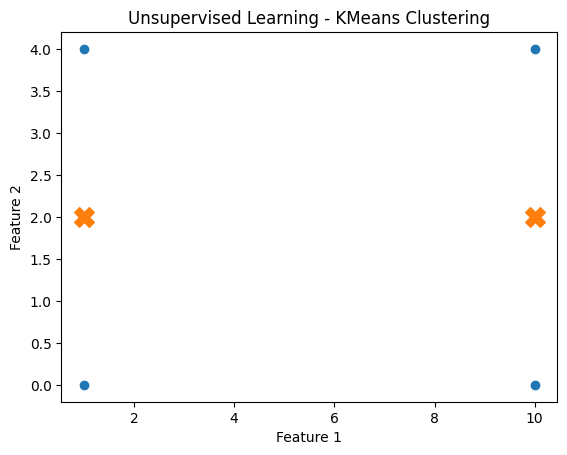

In [ ]:
# Unsupervised Learning - KMeans Clustering Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create Unlabeled Dataset
X = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [10, 2],
    [10, 4],
    [10, 0]
])

# Step 2: Create Model
kmeans = KMeans(n_clusters=2, random_state=0)

# Step 3: Train Model
kmeans.fit(X)

# Step 4: Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Centroids:", centroids)

# Step 5: Plot graph
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Unsupervised Learning - KMeans Clustering")
plt.show()


Accuracy : 1.0


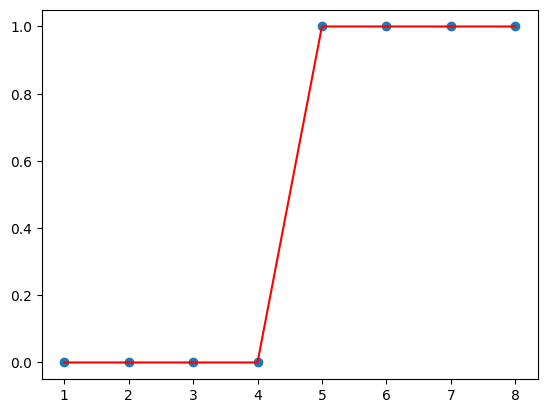

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x = np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
y = np.array([0,0,0,0,1,1,1,1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy :",accuracy_score(y_test, y_pred))
plt.scatter(x, y)
plt.plot(x, model.predict(x),color ="red")
plt.show()

   Overs  Runs
0      5     5
1      6    10
2      7    15
3      8    20
4      9    25
5     10    30
Prediction of x_test value is : [15. 10.]
Prediction of new value is : [55.]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


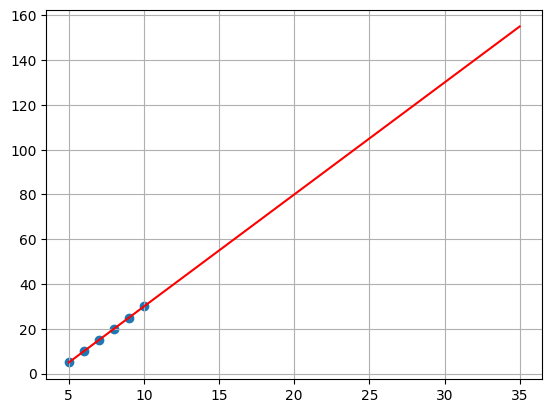

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1) Problem Defination overs and score

Data = pd.DataFrame ({
    "Overs" : [5, 6, 7, 8, 9, 10],
    "Runs" : [5, 10, 15, 20, 25, 30]
})

# 2) Read Data
print(Data)

# 3) Separate x and y variables

x = Data[["Overs"]]
y = Data["Runs"]

# 4) Training and Testing data's

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# 5) Object creation using class or ALgorithm

BCA = LinearRegression()

# 6) Checking relationship between x_train and y_train variables

BCA.fit(x_train, y_train)

# 7) Prediction of X_test variable

pred = BCA.predict(x_test)
print("Prediction of x_test value is :",BCA.predict(x_test))

print("Prediction of new value is :",BCA.predict([[15]]))

# 8) Plot Generate

rows = np.linspace(5, 35, 100).reshape(-1, 1)

plt.scatter(x, y)
plt.plot(rows, BCA.predict(rows), color ="red")
plt.grid(True)

plt.show()


Test Predictions: [30. 15.]
Model Accuracy (R²): 1.0
Prediction for 15 overs: 54.99999999999999


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


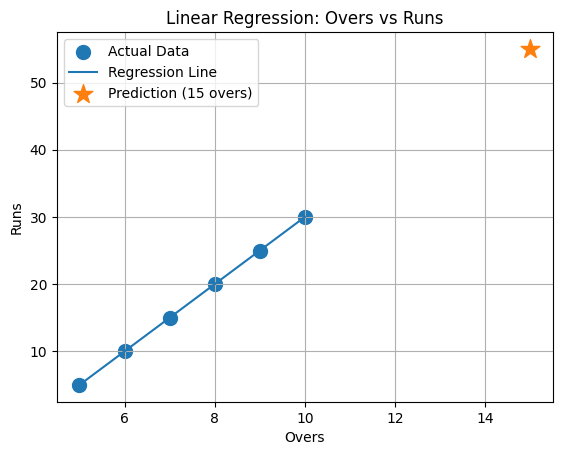

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


data = pd.DataFrame({
    "Overs": [5, 6, 7, 8, 9, 10],
    "Runs": [5, 10, 15, 20, 25, 30]
})

X = data[["Overs"]]
Y = data["Runs"]


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)


model = LinearRegression()

model.fit(X_train, Y_train)


# ----------- Correct Graph -----------

# Create smooth range from min to max overs
overs_range = np.linspace(X.min(), X.max(), 100)
overs_range = overs_range.reshape(-1, 1)

# Predict for line
runs_pred = model.predict(overs_range)

# Plot actual data
plt.scatter(X, Y, label="Actual Data", s=100)

# Plot regression line
plt.plot(overs_range, runs_pred, label="Regression Line")

# Plot predicted point
plt.scatter(new_over, new_prediction,
            marker='*', s=200, label="Prediction (15 overs)")

plt.xlabel("Overs")
plt.ylabel("Runs")
plt.title("Linear Regression: Overs vs Runs")
plt.legend()
plt.grid(True)
plt.show()

Predicted Salary: 45000.0


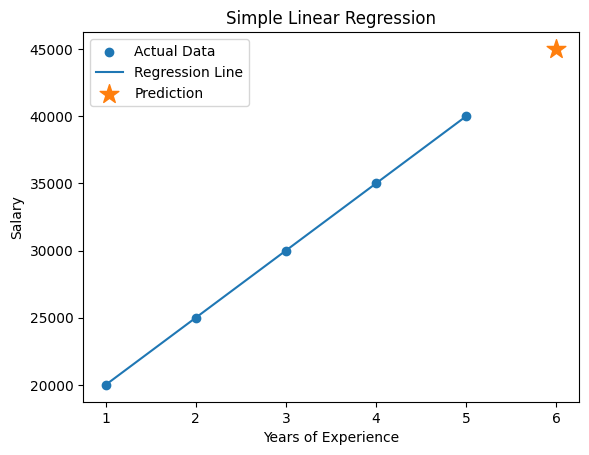

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


X = [[1], [2], [3], [4], [5]]


y = [20000, 25000, 30000, 35000, 40000]
model = LinearRegression()

model.fit(X, y)

new_experience = [[6]]
predicted_salary = model.predict(new_experience)

print("Predicted Salary:", predicted_salary[0])

# -------- Graph --------
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), label="Regression Line")
plt.scatter(new_experience, predicted_salary, label="Prediction", marker='*', s=200)

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

Cluster labels : [1 1 1 0 0 0]
Centroids : [[10.  2.]
 [ 1.  2.]]


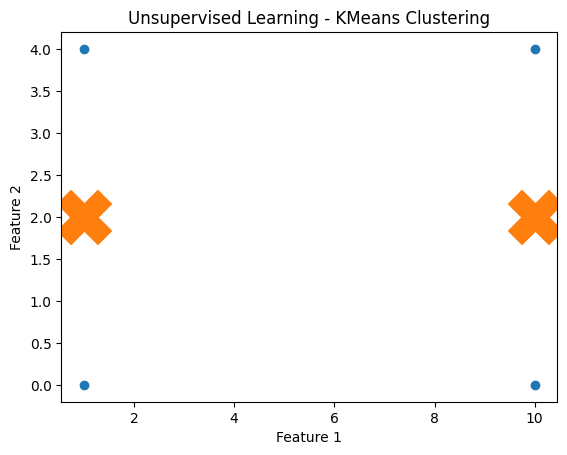

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = np.array([
    [1,2],
    [1,4],
    [1,0],
    [10,2],
    [10,4],
    [10,0]

])

kmeans = KMeans(n_clusters = 2, random_state = 0)

kmeans.fit(x)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster labels :",labels)
print("Centroids :",centroids)

# Plot Visualizations
plt.scatter(x[:, 0],x[:,1])
plt.scatter(centroids[:,0],centroids[:,1],marker ='X', s = 1500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Unsupervised Learning - KMeans Clustering")
plt.show()